
#Retina
Forward pass does contrast normalization and backward pass calculates the gradients on W=32 x H=32 x time=16 image data


In [1]:
#setup
import numpy as np   #numpy
import matplotlib.pyplot as plt  #plots

#import codes to load data
#from motiondeepnet/data_utils/data_utils.py
#"data_utils.py" was written by cs231n
from data_utils.data_utils import get_CIFAR10_data

#import motion deep net wrapper
from motnet import *

#allow use of plots inside the notebook
%matplotlib inline

#setup plot sizes
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#interpolation
plt.rcParams['image.interpolation'] = 'nearest'
#grayscale
plt.rcParams['image.cmap'] = 'gray'

#for auto-reloading external modules
#see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [2]:
#for now: load the (preprocessed) CIFAR10 data
#(ultimately: input data 32x32x16)

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


#Forward pass 
Load 3 training images and run forward pass 

In [3]:
#load three training images
X_test = data['X_test'][:2,:,:,:]

#run forward pass
out = contrast_norm_forward(X_test)

0.0


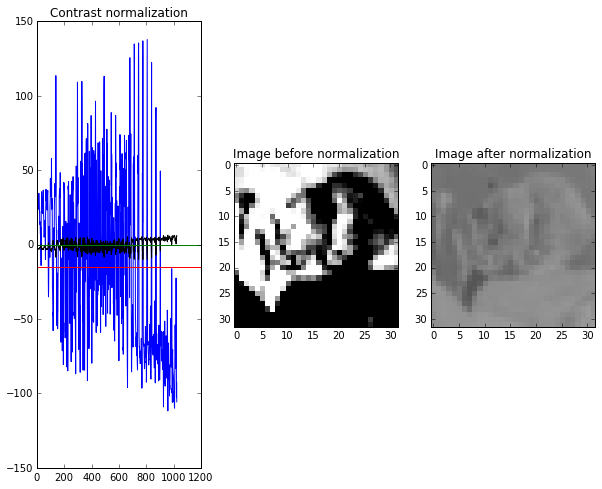

In [4]:
#Example of forward pass for a training image at one time frame
trainImage = 0
timeFrm    = 0

#plot input and output images
plt.subplot(1,3,2)
plt.imshow(X_test[trainImage,timeFrm,:,:],clim=(-30,30)) 

plt.title('Image before normalization')
plt.subplot(1,3,3)
plt.imshow(out[trainImage,timeFrm,:,:],clim=(-30,30))
plt.title('Image after normalization')

#plot the image values and mean
plt.subplot(1, 3, 1)
plt.plot(np.reshape(X_test[trainImage,timeFrm,:,:],-1))
plt.axhline(y=np.mean(X_test[trainImage,timeFrm,:,:]),color='r')
#plot the output values and mean
plt.plot(np.reshape(out[trainImage,timeFrm,:,:],-1),color='k')
plt.axhline(y=np.mean(out[trainImage,timeFrm,:,:]),color='g')
plt.title('Contrast normalization')

##check that image is contrast normalized
#should be = 0
test_out = (X_test[trainImage,timeFrm,:,:] - np.mean(X_test[trainImage,timeFrm,:,:]))/np.mean(X_test[trainImage,timeFrm,:,:])
print sum(sum(out[trainImage,timeFrm,:,:] - test_out))

